In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
# 혈통우 => 송아지(암, 수)
# 일반우 => 비육우(거세한 숫소나 암소를 비육시킴 - 살찌우는 소)
# 큰소 => 임신우(암소 임신 중인소나 임신계획이 있는 소), 씨소(번식용 소)

#### 1. 데이터 수집 및 전처리
- 일반우 데이터가 부족하여 일반우 데이터 추가 수집
- 단위가 다른 지역이 있어 100만 단위로 통일
- 불필요한 컬럼 제거(번호, 출하주, 개체번호(중복값 확인 후 삭제), 상태)
- 낙찰된 데이터만 필요하기 때문에 낙찰 이외의 범주는 제거
- 중량, 최저가, 낙찰가 0인 행 제거
- 성별 거세, 프 제거 수가 많지 않은 데이터

#### 2. 파일 불러오기

In [34]:
filename='./data/cow_data_clean.csv'
cow_DF=pd.read_csv(filename)
cow_DF.head(3)

,Unnamed: 0,성별,중량,최저가,낙찰가,결격사유 여부,종류,성별_N,종류_N
0,0,암,580,360,363,1,큰소,0,0
1,1,암,460,320,353,0,큰소,0,0
2,2,암,340,400,471,1,큰소,0,0


#### 3. 데이터 정보 확인

In [35]:
cow_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17446 non-null  int64 
 1   성별          17446 non-null  object
 2   중량          17446 non-null  int64 
 3   최저가         17446 non-null  int64 
 4   낙찰가         17446 non-null  int64 
 5   결격사유 여부     17446 non-null  int64 
 6   종류          17446 non-null  object
 7   성별_N        17446 non-null  int64 
 8   종류_N        17446 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.2+ MB


In [36]:
cow_DF.describe()

,Unnamed: 0,중량,최저가,낙찰가,결격사유 여부,성별_N,종류_N
count,17446.000000,17446.000000,17446.000000,17446.000000,17446.000000,17446.000000,17446.000000
mean,8723.908288,499.373553,669.749284,755.266651,0.112347,0.169666,1.125931
std,5037.092370,173.224803,297.929370,341.763391,0.315802,0.375350,0.857798
min,0.000000,110.000000,60.000000,57.000000,0.000000,0.000000,0.000000
25%,4361.250000,310.000000,410.000000,460.000000,0.000000,0.000000,0.000000
50%,8724.500000,545.000000,560.000000,633.000000,0.000000,0.000000,1.000000
75%,13085.750000,634.000000,980.000000,1095.000000,0.000000,0.000000,2.000000
max,17447.000000,1114.000000,1250.000000,1425.000000,1.000000,1.000000,2.000000


In [37]:
cow_DF.corr(numeric_only=True)['낙찰가']

Unnamed: 0    0.757304
중량            0.743921
최저가           0.982841
낙찰가           1.000000
결격사유 여부      -0.117345
성별_N         -0.326336
종류_N          0.805461
Name: 낙찰가, dtype: float64

In [38]:
# 최저가, 종류_N, 중량이 낙찰가와 가장 큰 상관성을 가진다.

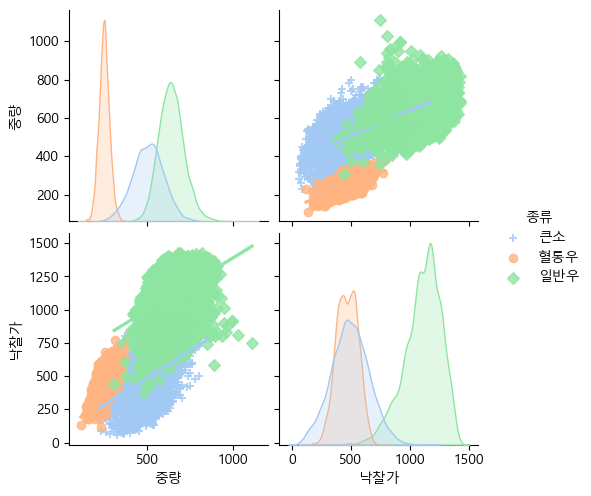

In [39]:
sns.pairplot(cow_DF[['중량','낙찰가','종류']],kind='reg',hue='종류',markers=['+','o','D'],palette='pastel')

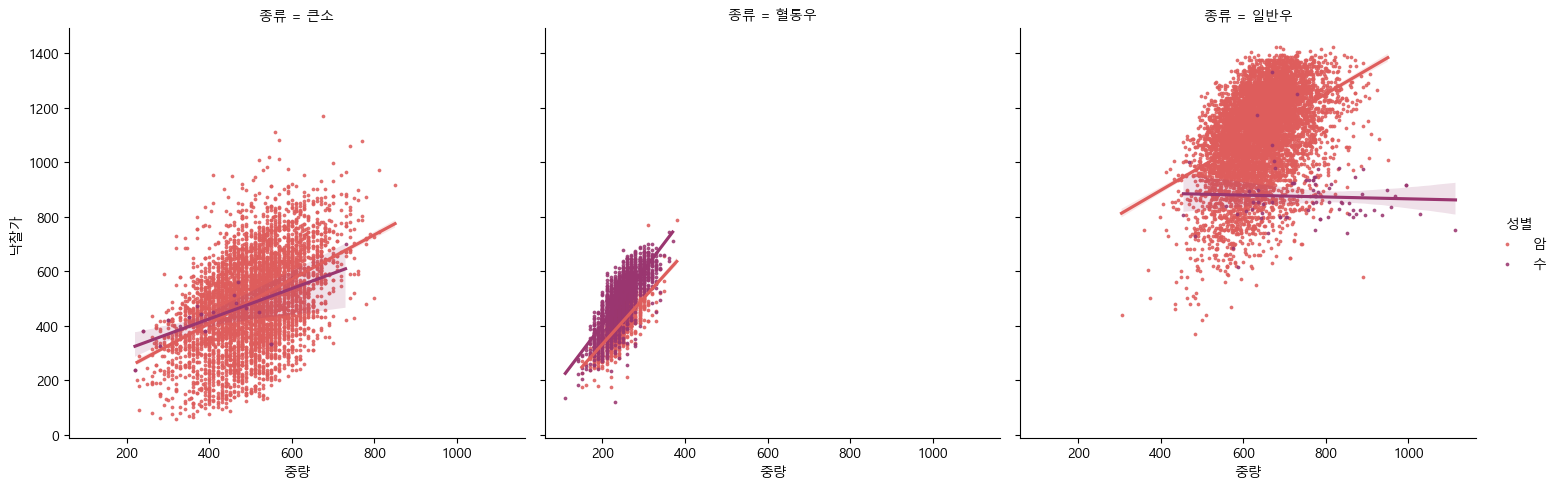

In [40]:
# 종류 성별
sns.lmplot(x='중량',y='낙찰가',hue='성별',col='종류',data=cow_DF,palette='flare',scatter_kws={'s':3})

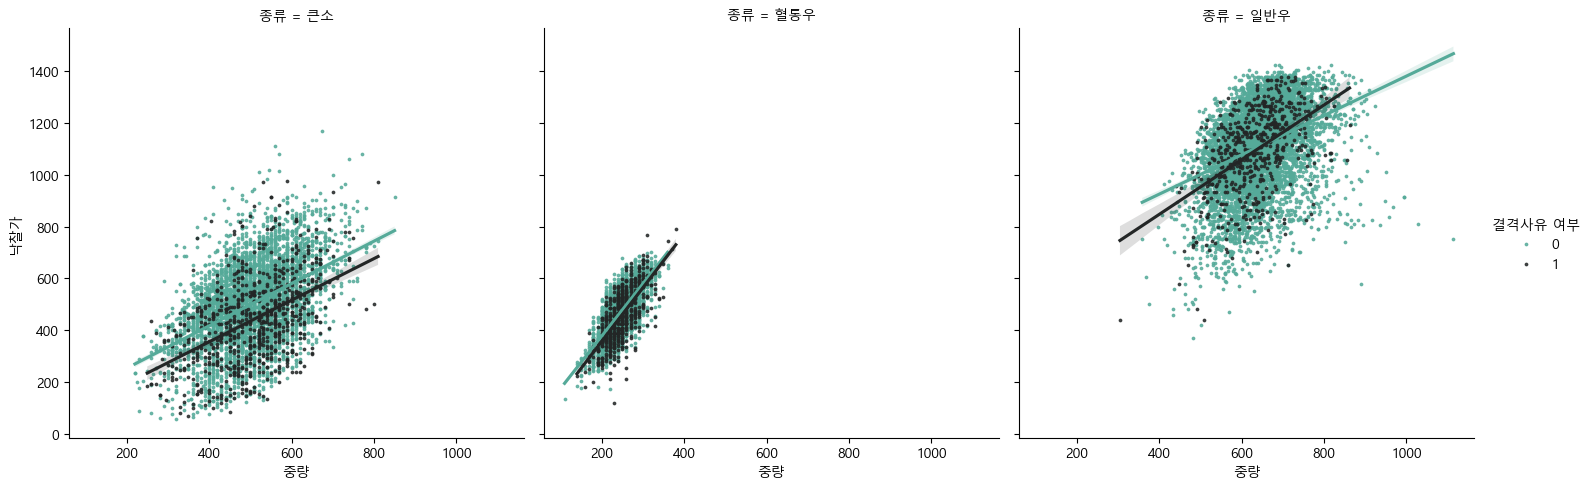

In [41]:
sns.lmplot(x='중량',y='낙찰가',hue='결격사유 여부',col='종류',data=cow_DF,palette='dark:#5A9_r',scatter_kws={'s':3})

In [42]:
cow_DF.head(3)

,Unnamed: 0,성별,중량,최저가,낙찰가,결격사유 여부,종류,성별_N,종류_N
0,0,암,580,360,363,1,큰소,0,0
1,1,암,460,320,353,0,큰소,0,0
2,2,암,340,400,471,1,큰소,0,0


---
# KNN 모형
---

In [43]:
from sklearn.neighbors import KNeighborsRegressor
train_x, test_x, train_y, test_y = train_test_split(cow_DF[['중량','최저가','종류_N']],cow_DF['낙찰가'],random_state=0)
cow_knn=KNeighborsRegressor(n_neighbors=13)
cow_knn.fit(train_x,train_y)
train_score=cow_knn.score(train_x,train_y)
test_score=cow_knn.score(test_x,test_y)
print(train_score,test_score)

0.9742741856287571 0.9700929176559352


In [44]:
from sklearn.utils import *
from sklearn.metrics import *
preds_y = cow_knn.predict(test_x)
mse=mean_squared_error(test_y,preds_y)
rmse=np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'R2 : {r2_score(test_y,preds_y)}')

MSE : 3444.1060978488235, RMSE : 58.68650694877677
R2 : 0.9700929176559352


---
# Linear 모형
---

In [45]:
from sklearn.linear_model import LinearRegression
train_x, test_x, train_y, test_y = train_test_split(cow_DF[['중량','최저가','종류_N']],cow_DF['낙찰가'],random_state=0)
cow_li=LinearRegression()
cow_li.fit(train_x,train_y)
train_score=cow_li.score(train_x,train_y)
test_score=cow_li.score(test_x,test_y)
print(train_score,test_score)
cow_li.coef_,cow_li.intercept_

0.9664675996548417 0.9664778715956881


(array([-0.02350389,  1.11131476, 11.82372266]), 10.216501703844415)

In [46]:
from sklearn.utils import *
from sklearn.metrics import *
preds_y = cow_li.predict(test_x)
mse=mean_squared_error(test_y,preds_y)
rmse=np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'R2 : {r2_score(test_y,preds_y)}')

MSE : 3860.4155872488195, RMSE : 62.132242734741354
R2 : 0.9664778715956881


---
# Ridge 모형
---

In [47]:
from sklearn.linear_model import Ridge
train_x, test_x, train_y, test_y = train_test_split(cow_DF[['중량','최저가','종류_N']],cow_DF['낙찰가'],random_state=0,shuffle=True)
cow_ri=Ridge(alpha=0.1)
cow_ri.fit(train_x,train_y)
train_score=cow_ri.score(train_x,train_y)
test_score=cow_ri.score(test_x,test_y)
train_score,test_score

(0.966467599654441, 0.9664778755568896)

In [48]:
from sklearn.utils import *
from sklearn.metrics import *
preds_y = cow_ri.predict(test_x)
mse=mean_squared_error(test_y,preds_y)
rmse=np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'R2 : {r2_score(test_y,preds_y)}')

MSE : 3860.415131076001, RMSE : 62.132239063758206
R2 : 0.9664778755568896


---
# Lasso 모형
---

In [49]:
from sklearn.linear_model import Lasso
train_x, test_x, train_y, test_y = train_test_split(cow_DF[['중량','최저가','종류_N']],cow_DF['낙찰가'],random_state=0,shuffle=True)
cow_la=Lasso(alpha=0.1)
cow_la.fit(train_x,train_y)
train_score=cow_la.score(train_x,train_y)
test_score=cow_la.score(test_x,test_y)
train_score,test_score

(0.9664671148984982, 0.9664817175369967)

In [50]:
from sklearn.utils import *
from sklearn.metrics import *
preds_y = cow_la.predict(test_x)
mse=mean_squared_error(test_y,preds_y)
rmse=np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'R2 : {r2_score(test_y,preds_y)}')

MSE : 3859.9726878124698, RMSE : 62.12867846504116
R2 : 0.9664817175369967


---
# Rigde & Lasso
---

In [51]:
import numpy as np
ridge_pred = cow_ri.predict(test_x)
lasso_pred = cow_la.predict(test_x)
pred = 0.5*ridge_pred + 0.5*lasso_pred
mse = mean_squared_error(test_y,pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'R2 : {r2_score(test_y,pred)}')


MSE : 3860.1792957309203, RMSE : 62.13034118472971
R2 : 0.9664799234459164


---
# RandomForest 모형
---


In [52]:
from sklearn.ensemble import RandomForestRegressor
train_x, test_x, train_y, test_y = train_test_split(cow_DF[['중량','최저가','종류_N']],cow_DF['낙찰가'],random_state=0,shuffle=True)
cow_rf=RandomForestRegressor(max_depth=5)
cow_rf.fit(train_x,train_y)
train_score=cow_rf.score(train_x,train_y)
test_score=cow_rf.score(test_x,test_y)
train_score,test_score

(0.9705773051647228, 0.9698850682696303)

In [53]:
from sklearn.utils import *
from sklearn.metrics import *
preds_y = cow_rf.predict(test_x)
mse=mean_squared_error(test_y,preds_y)
rmse=np.sqrt(mse)
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'R2 : {r2_score(test_y,preds_y)}')

MSE : 3468.042078315632, RMSE : 58.89008471988839
R2 : 0.9698850682696303


---
# XGB 모델
---

In [54]:
from xgboost import XGBRegressor

In [55]:
cow_xgb=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
cow_xgb.fit(train_x,train_y)
train_score=cow_xgb.score(train_x,train_y)
test_score=cow_xgb.score(test_x,test_y)
train_score,test_score

(0.9684229167780046, 0.9660137478544419)

---
# LGBM 모델
---

In [56]:
from lightgbm import LGBMRegressor

In [57]:
cow_lgb=LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, colsample_bytree=0.4, subsample=0.6, reg_lambda=10, n_jobs=-1)
cow_lgb.fit(train_x,train_y)
train_score=cow_lgb.score(train_x,train_y)
test_score=cow_lgb.score(test_x,test_y)
train_score,test_score

(0.9658935850517658, 0.9655681393380181)

In [58]:
# knn, randomforest가 가장 좋음

---
# 최종 모델(KNN)
---

In [59]:
weight=int(input('중량을 입력하세요.(kg)'))
min_price=int(input('최저가를 입력하세요.(만 원)'))
variety=int(input('종류를 입력하세요. (큰소:0, 혈통우:1, 일반우:2)'))
map(variety,{"큰소":0, "혈통우":1, "일반우":2})
print(f'중량: {weight}kg, 최저가: {min_price}만원, 종류: {"큰소" if variety==0 else "혈통우" if variety==1 else "일반우"}인 소의 예상 낙찰가는 {cow_li.predict([[weight, min_price, variety]])[0]:.2f}만 원입니다.')

중량: 600kg, 최저가: 750만원, 종류: 일반우인 소의 예상 낙찰가는 853.25만 원입니다.


c:\Users\KDP-040\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
